# INF552 Homework4:

Student Name : Hsin-Yu, Chang (1160173733)

In [2]:
import os
#os.chdir("./Desktop/USC2018Fall/INF552/assignment")
os.getcwd()

'/Users/changhsinyu/Desktop/USC2018Fall/INF552/assignment'

## 1. The LASSO and Boosting for Regression

### (a)  Download Communities and Crime Data

In [1]:
import urllib.request
import pandas
import numpy as np
import matplotlib.pyplot as plt

#1.(a)
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data"
filename = 'communities.txt'
attrfile = 'commuattr.txt'
urllib.request.urlretrieve(url, filename)

('communities.txt', <http.client.HTTPMessage at 0x122c74860>)

In [16]:
with open(filename) as fd:
    comm = pandas.read_csv(fd, sep=",", header=None, na_values = '?')
with open(attrfile) as fd:
    attr = pandas.read_csv(fd, sep=" ", header=None)    

In [17]:
attr = attr[[1, 2]]
attr.columns = ['attr', 'type']
comm.columns = attr.attr.values
comm = comm.iloc[:,5:] 
comm.shape
attr = attr.iloc[5:,:] 
comm = comm.astype('float64', copy=True)

### (b) Data Imputation Technique dealing with missing value 

__>__ Calculate the proportion of missing value of each feature

In [18]:
missc = comm.apply(lambda x: sum(x.isnull())/len(x),axis = 0)
missc[missc.values!=0]

OtherPerCap             0.000502
LemasSwornFT            0.840020
LemasSwFTPerPop         0.840020
LemasSwFTFieldOps       0.840020
LemasSwFTFieldPerPop    0.840020
LemasTotalReq           0.840020
LemasTotReqPerPop       0.840020
PolicReqPerOffic        0.840020
PolicPerPop             0.840020
RacialMatchCommPol      0.840020
PctPolicWhite           0.840020
PctPolicBlack           0.840020
PctPolicHisp            0.840020
PctPolicAsian           0.840020
PctPolicMinor           0.840020
OfficAssgnDrugUnits     0.840020
NumKindsDrugsSeiz       0.840020
PolicAveOTWorked        0.840020
PolicCars               0.840020
PolicOperBudg           0.840020
LemasPctPolicOnPatr     0.840020
LemasGangUnitDeploy     0.840020
PolicBudgPerPop         0.840020
dtype: float64

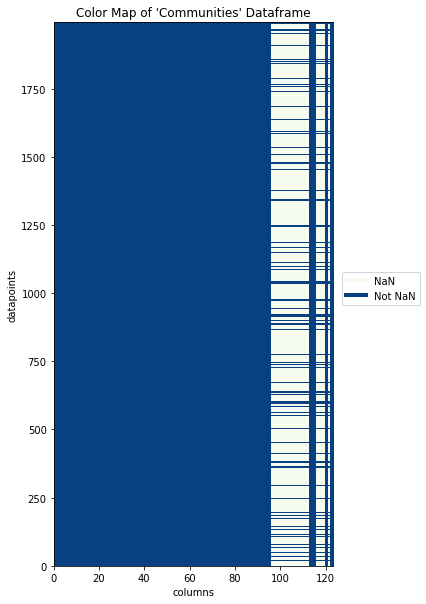

In [6]:
from matplotlib.lines import Line2D
import matplotlib
cmap = matplotlib.cm.get_cmap('GnBu')  
customlegend = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]  
        
plt.figure(figsize=(5,10))
plt.pcolor(~comm.isnull(), cmap='GnBu')
plt.xlabel('columns')
plt.ylabel('datapoints')
plt.title("Color Map of 'Communities' Dataframe")
plt.legend(customlegend, ['NaN', 'Not NaN'], bbox_to_anchor=(1.33, 0.55))

__>__ From this missing value plot, I see that missing values are concentrated in some features of some datapoints, it seems like it is not missing randomly. By seeing the description of the dataset, it shows that there are some attributes related to LEMA survey which is only conducted in the communities with at least 100 police officers, so communities not having the least amount of the officer do not have the value of that survey and cause the missing value. 

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


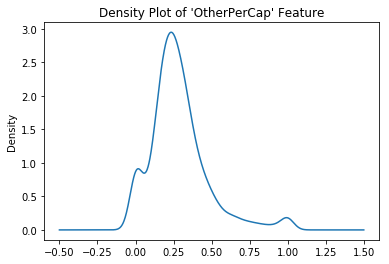

In [19]:
####just drop it
#drop the columns with high missing proportion >0.3
ncomm = comm.loc[:,missc.values<=0.3]
#still one missing value in datapoint 130 in OtherPerCap column
#assign a value to it 
#assign 'OtherPerCap' of no.130 obs with mean
pandas.Series(ncomm['OtherPerCap']).plot(kind='density')
plt.title("Density Plot of 'OtherPerCap' Feature")
ncomm = ncomm.fillna(ncomm.mean())


__\>__ There are 23 attributes with missing values, most of them have large proportion of missing value (about 84%). For those with high proportion of missing value, I decide to ignore them, beacause using a few datapoints to assign lots of missing values won't be a good choice. For the 'OtherPerCap' attribute (only one missing value), I use mean value of that attribute to assign it.  

In [20]:
#ncomm.isnull().any().any()
ncommy = ncomm.ViolentCrimesPerPop 
ncommx = ncomm.drop(columns = 'ViolentCrimesPerPop') 

### (c) Correlation Matrix of the Features

Text(0.5, 1.0, "Features' Correlation Matrix Plot")

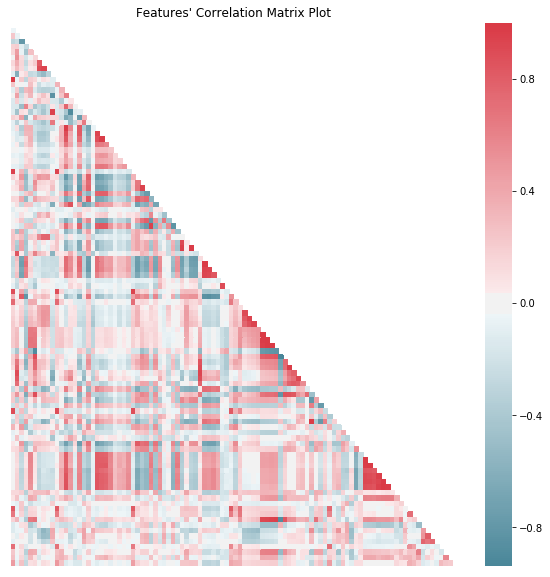

In [10]:
#correlation matrix plot
import seaborn as sns

ncommxcorr = ncommx.corr()
mask = np.zeros_like(ncommxcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plot the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(ncommxcorr, mask=mask, cmap=cmap,center=0,
            xticklabels=False, yticklabels=False)
plt.title("Features' Correlation Matrix Plot")

__>__ From the correlation matrix plot (only showing lower triangle), we can see there are high correlations among attributes.

In [23]:
cor = ncommxcorr.abs().unstack()
#only oneself correlation = 1 
#sum(cor==1)
cor = cor[cor!=1]
cor.sort_values(ascending = False)
cor = cor.sort_values(ascending = False).drop_duplicates()
cor[cor>0.8]

PctRecImmig10        PctRecImmig8           0.995525
OwnOccMedVal         OwnOccLowQuart         0.994481
PctRecImmig5         PctRecImmig8           0.993433
numbUrban            population             0.993112
OwnOccHiQuart        OwnOccMedVal           0.991302
PctRecentImmig       PctRecImmig5           0.988999
RentMedian           MedRent                0.988585
PctRecImmig10        PctRecImmig5           0.985616
PctKids2Par          PctFam2Par             0.985358
PctLargHouseOccup    PctLargHouseFam        0.984403
FemalePctDiv         TotalPctDiv            0.983217
PctHousOwnOcc        PctPersOwnOccup        0.981899
RentMedian           RentHighQ              0.981829
PctRecImmig8         PctRecentImmig         0.977964
medFamInc            medIncome              0.977616
MedRent              RentHighQ              0.977180
OwnOccHiQuart        OwnOccLowQuart         0.976237
TotalPctDiv          MalePctDivorce         0.975726
whitePerCap          perCapInc              0.

__>__ There are 127 pairs of features with high correlation (>0.8).

### (d) Coefficient of Variation for each Features

In [11]:
#CV for each feature
cv = ncommx.var()/ncommx.mean()

#high CV dataframe
import math
n = math.floor(math.sqrt(128))
highcvfeature = cv.sort_values(ascending = False).index[:n]
highcvdf = comm[highcvfeature.tolist()+['ViolentCrimesPerPop']]
cv

population               0.279637
householdsize            0.057841
racepctblack             0.357587
racePctWhite             0.079015
racePctAsian             0.283898
racePctHisp              0.375306
agePct12t21              0.056777
agePct12t29              0.041733
agePct16t24              0.082446
agePct65up               0.075875
numbUrban                0.256736
pctUrban                 0.284167
medIncome                0.121379
pctWWage                 0.059942
pctWFarmSelf             0.142881
pctWInvInc               0.063970
pctWSocSec               0.063981
pctWPubAsst              0.155280
pctWRetire               0.058587
medFamInc                0.104626
perCapInc                0.104275
whitePerCap              0.094813
blackPerCap              0.101149
indianPerCap             0.133416
AsianPerCap              0.118457
OtherPerCap              0.128067
HispPerCap               0.086773
NumUnderPov              0.294900
PctPopUnderPov           0.172265
PctLess9thGrad

### (e) Scatterplots and Boxplots for high CV Features

In [12]:
highcvfeature

Index(['LemasPctOfficDrugUn', 'NumStreet', 'racePctHisp', 'NumInShelters',
       'racepctblack', 'NumIlleg', 'PctUsePubTrans', 'PctNotSpeakEnglWell',
       'PctRecImmig5', 'PctRecentImmig', 'PctRecImmig8'],
      dtype='object')

##### -Boxplot

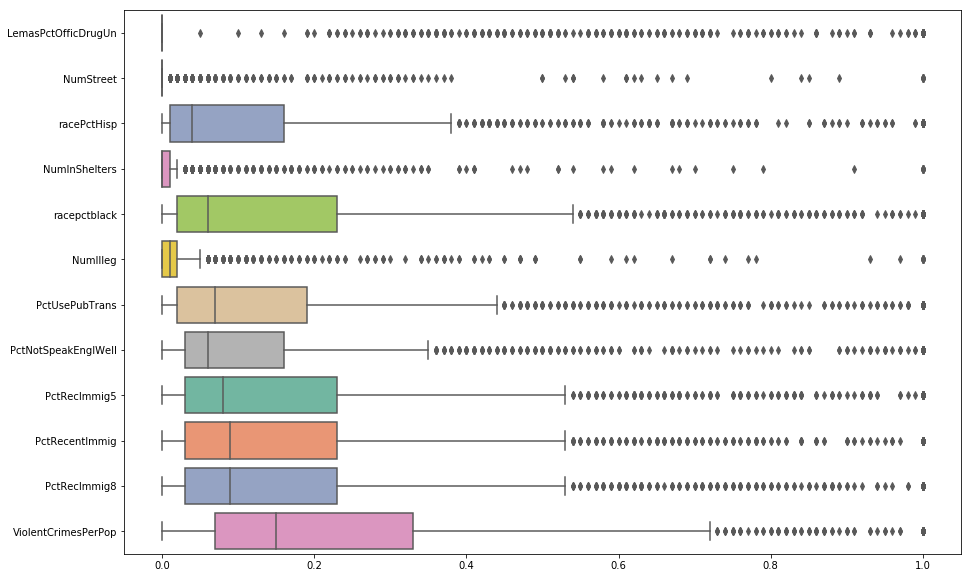

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(data=highcvdf, orient="h", palette="Set2")

##### -ScatterPlot

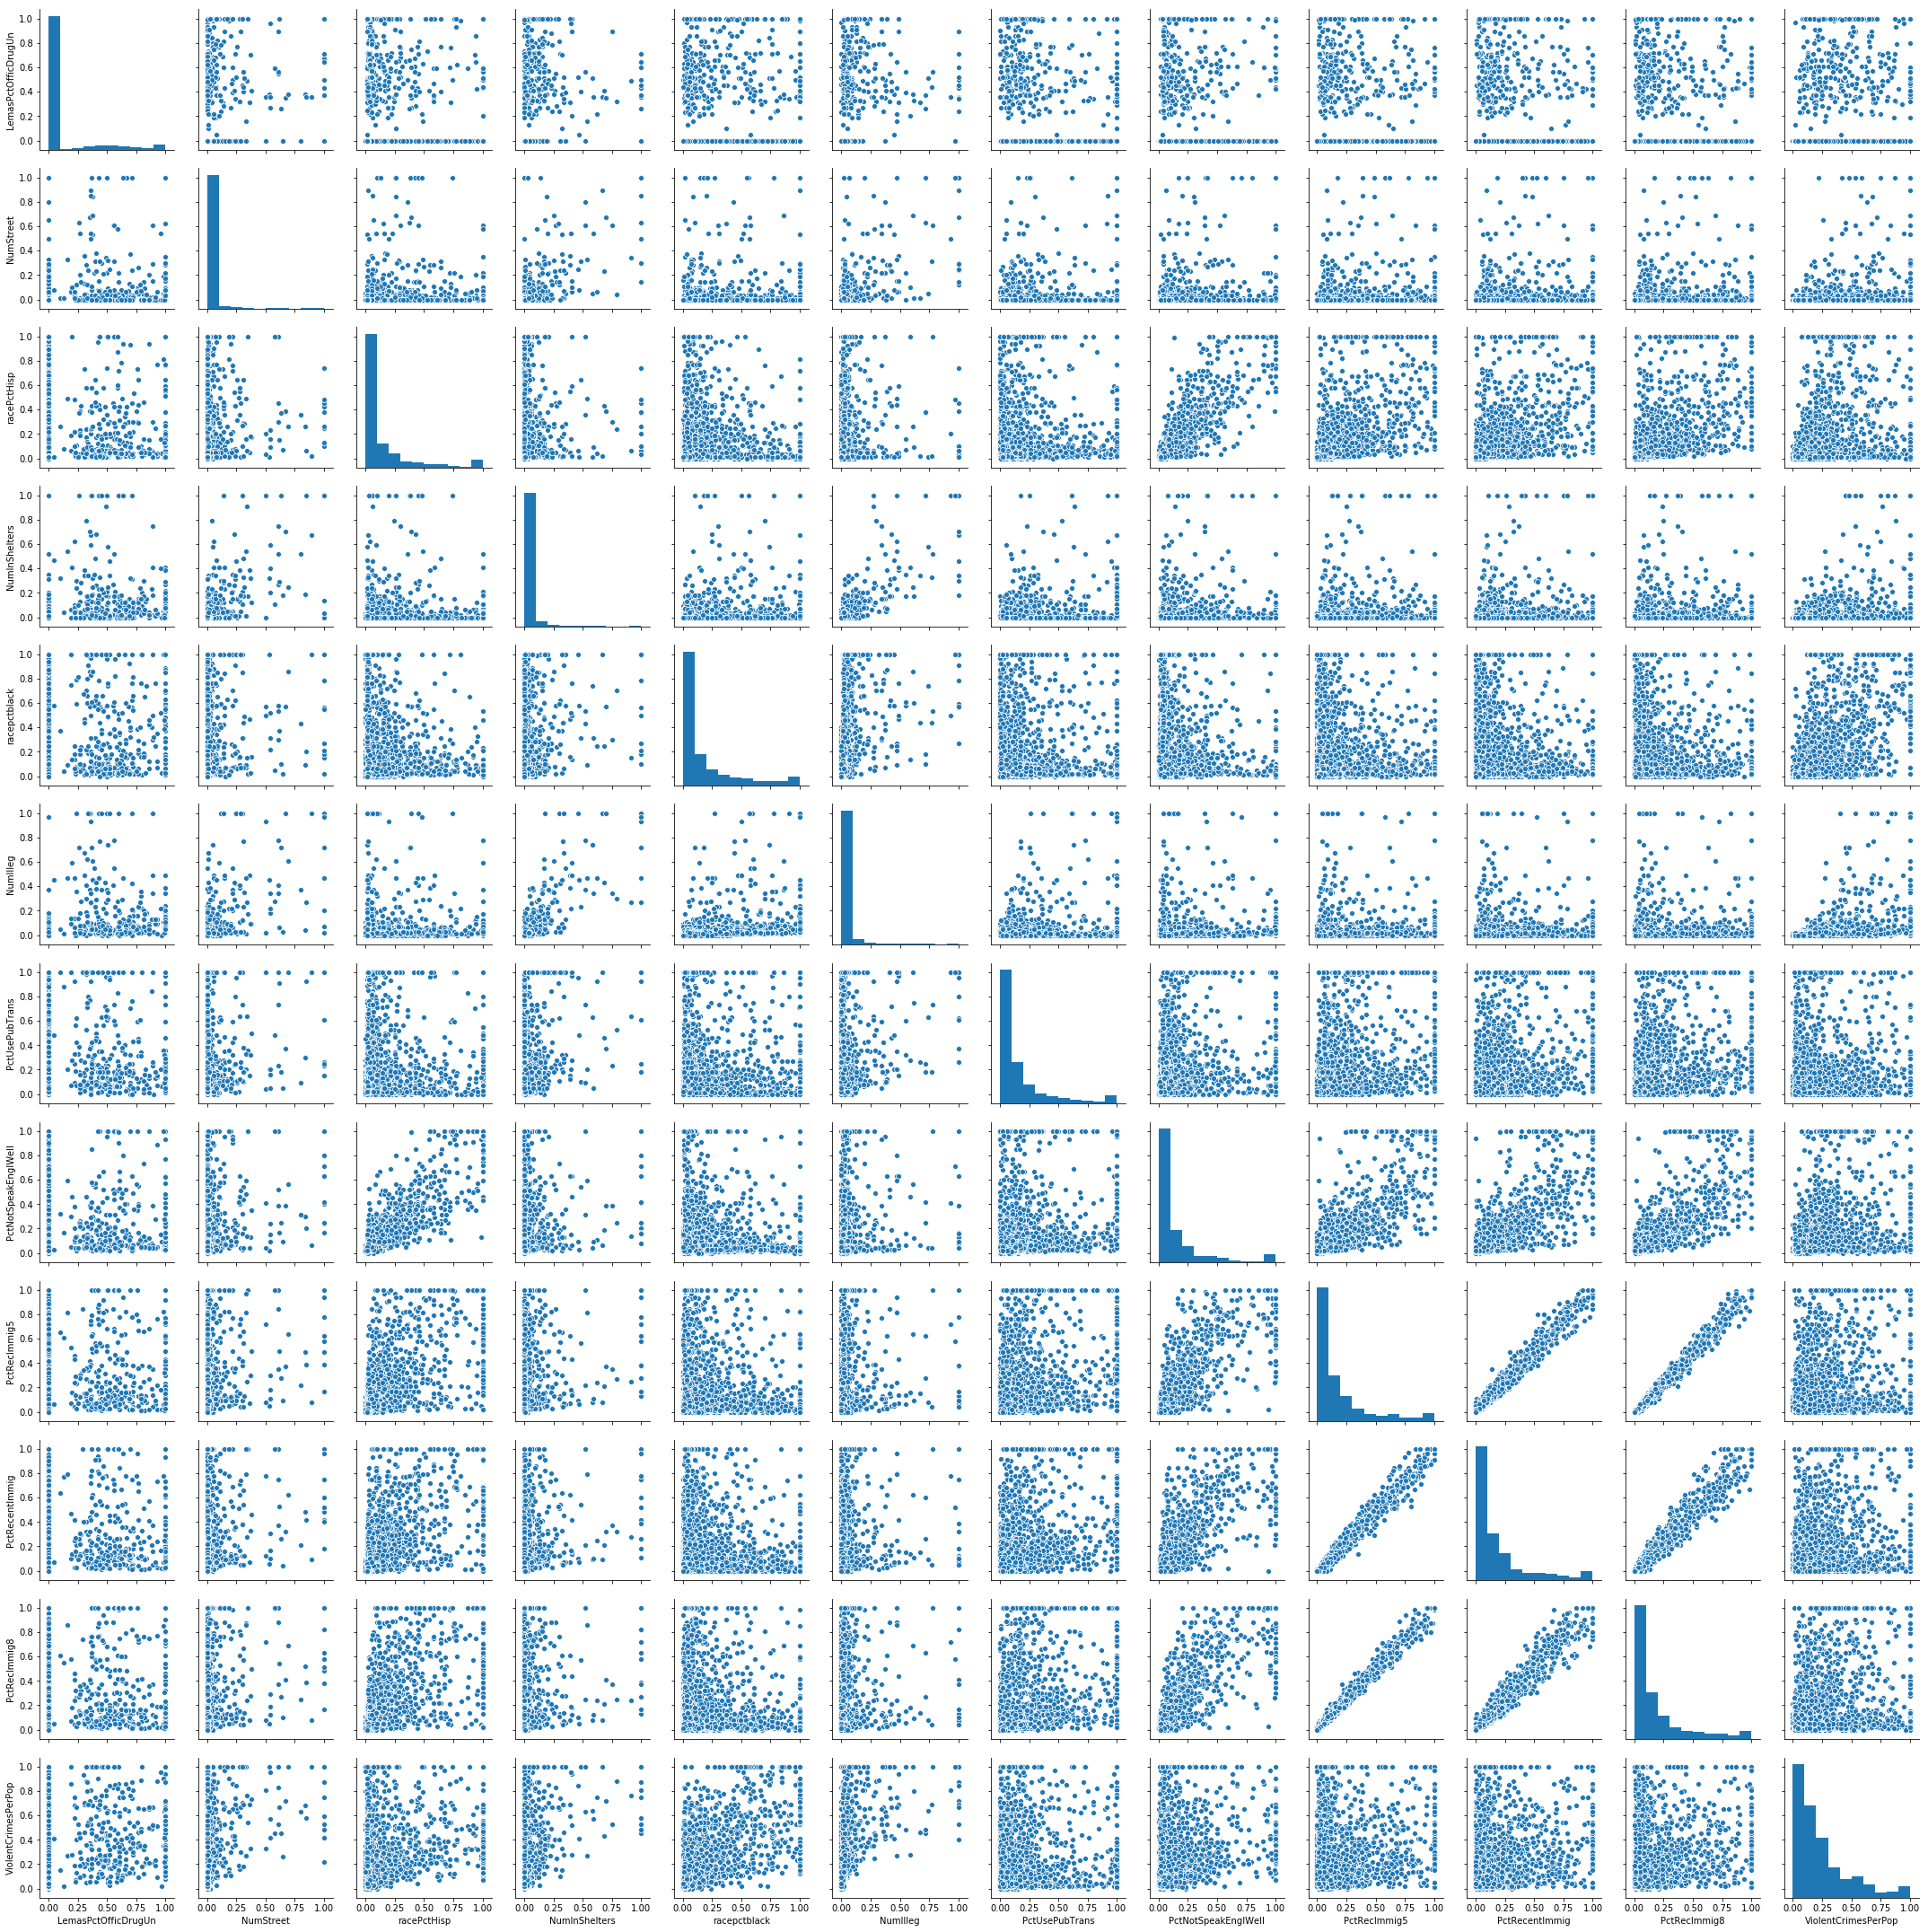

In [18]:
sns.pairplot(highcvdf)

__>__ It is hard to judge the significance of these features by seeing the scatterplot, because the dots are too dense to see pattern. But by a rough observation, there might have relationship between 'racePctblack' and our response. Among all high cv features, we can see high correlations between 'PctRecImmig5', 'PctRecentImmig' and 'PctRecImmig8'.

##### Split data into Traing and Test set

In [27]:
####train test
ttrain = ncomm.iloc[:1495,:] #exclude end digit
test = ncomm.iloc[1495:,:]

y = ttrain.ViolentCrimesPerPop
X = ttrain.drop(columns='ViolentCrimesPerPop')

### (f) Linear Model using Least Square

In [34]:
#OLS
import statsmodels.api as sm
regr = sm.OLS(y, X).fit()
#print(regr.summary())
#feature with significance
print('Features with Significance based on OLS regression')
regr.pvalues[regr.pvalues<0.01]

Features with Significance based on OLS regression


racepctblack             1.430138e-07
pctUrban                 8.140703e-03
PctEmploy                3.728921e-04
MalePctNevMarr           9.185045e-04
PctWorkMom               5.326099e-04
PctPersDenseHous         6.917806e-04
PctVacantBoarded         1.982490e-03
PctVacMore6Mos           2.848861e-03
MedOwnCostPctIncNoMtg    2.892918e-03
NumStreet                9.100730e-04
dtype: float64

__>__ By OLS, I choose features with p-value<0.01, having statistically significant relationship with our response. Among all these features, only two of them ('racepctblack' and 'NumStreet') overlap with the high cv features. In sum, it is hard to judge significance based on high CV, beacuase high CV might cause by lots of outliers in those features.

In [210]:
trainerror = round(regr.mse_resid, 4)
print('Training Error of OLS: %0.4f' % trainerror)

testpredy = regr.predict(test.drop(columns='ViolentCrimesPerPop'))
testerror = round(sum((test.ViolentCrimesPerPop-testpredy)**2)/(len(testpredy)), 4)
print('Test Error of OLS: %0.4f' % testerror)

Training Error of OLS: 0.0178
Test Error of OLS: 0.0180


### (g) Ridge Regression

In [25]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import KFold, cross_val_score
fold = 5
alphas = [1e-3, 1e-2, 1e-1, 0.1, 1, 10, 100, 1e3, 1e4, 2e4, 5e4, 8e4, 1e5, 1e6, 1e7, 1e8]

In [212]:
#Ridge
#return the ridge regression with the best alpha
ridgeregr = RidgeCV(alphas=alphas, cv = KFold(n_splits=fold, shuffle = True)).fit(X, y)
ridgeregr.alpha_ 

1.0

__>__ With ridge regression, I choose optimal alpha=1 based on 5-fold cross-validation.

In [213]:
ridgetrainerror = round(sum((y-ridgeregr.predict(X))**2)/(len(y)-(len(ridgeregr.coef_)+1)), 4)
print('Training Error of Ridge: %0.4f' % ridgetrainerror)
#ridgetesterror = round(sum((test.ViolentCrimesPerPop-ridgeregr.predict(test.drop(columns='ViolentCrimesPerPop')))**2)/(len(test.ViolentCrimesPerPop)-(len(ridgeregr.coef_)+1)), 4)
ridgetesterror = round(sum((test.ViolentCrimesPerPop-ridgeregr.predict(test.drop(columns='ViolentCrimesPerPop')))**2)/(len(test.ViolentCrimesPerPop)), 4)
print('Test Error of Ridge: %0.4f' % ridgetesterror)

Training Error of Ridge: 0.0182
Test Error of Ridge: 0.0175


With the ridge regression optimization, we can see our model performs well in test set, even better than our training set (adjusting training error based on the flexibilty), which is because we sacrifice bias of the model to prevent from overfitting to the training set. 

### (g) LASSO Regression

In [28]:
#Lasso
#without normalized
lassoregr = LassoCV(alphas=alphas, cv = KFold(n_splits=fold, shuffle = True)).fit(X, y)
lassoregr.alpha_ 
lassoselect = pandas.Series(data = lassoregr.coef_[lassoregr.coef_!=0], index = X.columns[lassoregr.coef_!=0] )
lassoselect

racepctblack             0.211463
racePctWhite            -0.011639
agePct12t29             -0.005628
pctUrban                 0.038318
pctWPubAsst              0.028978
AsianPerCap              0.009981
MalePctDivorce           0.146269
PctKids2Par             -0.213557
PctYoungKids2Par        -0.007436
PctWorkMom              -0.049415
PctIlleg                 0.156913
PctRecImmig10            0.003233
PctPersDenseHous         0.156012
HousVacant               0.100892
PctHousOccup            -0.045209
PctVacantBoarded         0.034946
MedRentPctHousInc        0.023647
MedOwnCostPctIncNoMtg   -0.018465
NumStreet                0.081178
PctForeignBorn           0.040757
PctSameCity85            0.000901
LemasPctOfficDrugUn      0.006051
dtype: float64

In [29]:
lassoregr.alpha_

0.001

__>__ With LASSO regression optimization, I choose alpha=0.001 based on 5-fold cross validation. It selects 22 features from all remain 100 features, and shrinks the rest to zero. Some significant features in OLS remains their importance in LASSO regression optimization, such as 'racepctblack', 'PctPersDenseHous' and 'NumStreet'.

In [217]:
lassotrainerror = round(sum((y-lassoregr.predict(X))**2)/(len(y)-(len(lassoregr.coef_)+1)), 4)
print('Training Error of LASSO without normalized: %0.4f' % lassotrainerror)
#lassotesterror = round(sum((test.ViolentCrimesPerPop-lassoregr.predict(test.drop(columns='ViolentCrimesPerPop')))**2)/(len(test.ViolentCrimesPerPop)-(len(lassoregr.coef_)+1)), 4)
lassotesterror = round(sum((test.ViolentCrimesPerPop-lassoregr.predict(test.drop(columns='ViolentCrimesPerPop')))**2)/(len(test.ViolentCrimesPerPop)), 4)
print('Test Error of LASSO without normalized: %0.4f' % lassotesterror)

Training Error of LASSO without normalized: 0.0201
Test Error of LASSO without normalized: 0.0175


__>__ Comparing to the training error with ridge regression, we can see ridge regression performs better in training set, because it only shrinks features toward zero, but still remains all features in the model. By contrast, their test error perform the same, so even though using subset of features to predict our outcome, we can still get good performance in test error comparing to the model with all features involved.  

In [218]:
#with normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scalX = scaler.fit_transform(X)
scalX = pandas.DataFrame(scalX)
scalX.columns = X.columns

nlassoregr = LassoCV(alphas=alphas, cv = KFold(n_splits=fold, shuffle = True)).fit(scalX, y)
nlassoregr.alpha_ 
nlassoselect = pandas.Series(data = nlassoregr.coef_[nlassoregr.coef_!=0], index = scalX.columns[nlassoregr.coef_!=0])
nlassoselect

racepctblack             0.211561
racePctWhite            -0.011666
agePct12t29             -0.005161
pctUrban                 0.038296
pctWPubAsst              0.028886
AsianPerCap              0.009956
MalePctDivorce           0.146436
PctKids2Par             -0.213230
PctYoungKids2Par        -0.007476
PctWorkMom              -0.049461
PctIlleg                 0.156894
PctRecImmig10            0.003413
PctPersDenseHous         0.155895
HousVacant               0.100891
PctHousOccup            -0.045369
PctVacantBoarded         0.034845
MedRentPctHousInc        0.023787
MedOwnCostPctIncNoMtg   -0.018556
NumStreet                0.081213
PctForeignBorn           0.040666
PctSameCity85            0.001461
LemasPctOfficDrugUn      0.006038
dtype: float64

In [222]:
nlassotrainerror = round(sum((y-nlassoregr.predict(X))**2)/(len(y)-(len(nlassoregr.coef_)+1)), 4)
print('Training Error of LASSO with normalized: %0.4f' % nlassotrainerror)
#normalize test data 
scaltestX = scaler.fit_transform(test.drop(columns='ViolentCrimesPerPop'))
scaltestX = pandas.DataFrame(scaltestX)
scaltestX.columns = X.columns

#nlassotesterror = round(sum((test.ViolentCrimesPerPop-nlassoregr.predict(scaltestX))**2)/(len(test.ViolentCrimesPerPop)-(len(nlassoregr.coef_)+1)), 4)
nlassotesterror = round(sum((test.ViolentCrimesPerPop-nlassoregr.predict(scaltestX))**2)/(len(test.ViolentCrimesPerPop)), 4)
print('Test Error of LASSO with normalized: %0.4f' % nlassotesterror)

Training Error of LASSO with normalized: 0.0201
Test Error of LASSO with normalized: 0.0175


__>__ Doing LASSO with normalized data, the model selects the same features and performs same like without doing the normalization.

### (i) PCR model

In [31]:
#before PCA, we scale the data
#PCA
from sklearn.preprocessing import StandardScaler
def stdscaler(data):
    scaler = StandardScaler()
    scalX = scaler.fit_transform(data)
    scalX = pandas.DataFrame(scalX)
    scalX.columns = data.columns
    return scalX

In [32]:
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pcrcv(X, y, p):   
    fold = 5
    kf = KFold(n_splits=fold)
    validerror = 0
    for traini, validi in kf.split(X):
        trax = stdscaler(X.loc[traini,:]) #already reset index
        vax = stdscaler(X.loc[validi,:])
        tray = y[traini].reset_index(drop=True)
        vay = y[validi].reset_index(drop=True)
        
        pca = PCA(n_components=p).fit(trax)
        #pca.transform(trax)
        trpc = pandas.DataFrame(data = pca.transform(trax))
        vapc = pandas.DataFrame(data = pca.transform(vax))
        
        regr = sm.OLS(tray, trpc).fit()
        validerror += round(sum((vay-regr.predict(vapc))**2)/(len(vay)-(p+1)), 4)
    validerror = validerror/fold
    return validerror

In [35]:
M = X.shape[1]
cvdf = pandas.DataFrame(columns = ['CVerror'])
for p in range(1,M+1):
   cvdf.loc[str(p),:]=pcrcv(X, y, p)
bestM = int(cvdf.index[cvdf.CVerror ==min(cvdf.CVerror)][0])

8

In [37]:
bestM, min(cvdf.CVerror)

(8, 0.08104)

__>__ I choose number for our PCR as 8 based on the cross validation with the smallest CV error rate = 0.081.  

In [227]:
trax = stdscaler(X) #already reset index
tex = stdscaler(test.drop(columns='ViolentCrimesPerPop'))

pca = PCA(n_components=bestM).fit(trax)
#pca.transform(trax)
trpc = pandas.DataFrame(data = pca.transform(trax))
tepc = pandas.DataFrame(data = pca.transform(tex))
tey = test.ViolentCrimesPerPop.reset_index(drop=True)
        
regr = sm.OLS(y, trpc).fit()
pctrainerror = round(sum((y-regr.predict(trpc))**2)/(len(y)-(bestM+1)), 4)
print('Train Error of PCR: %0.4f' % pctrainerror)
#testerror = round(sum((tey-regr.predict(tepc))**2)/(len(tey)-(bestM+1)), 4)
pctesterror = round(sum((tey-regr.predict(tepc))**2)/(len(tey)), 4)
print('Test Error of PCR: %0.4f' % pctesterror)

Train Error of PCR: 0.0789
Test Error of PCR: 0.0720


__>__ Compared to other regressions we built in previous questions, the PCR model is the one having the highest train error and test error.

### (j) Boosting Tree

In [87]:
import xgboost as xgb

In [96]:
xgcvdf = pandas.DataFrame(columns = ['CVerror'])
traindmatrix = xgb.DMatrix(data=X,label=y)

for alpha in alphas:
    params = {"objective":"reg:linear",'colsample_bytree': 0.3,
              'learning_rate': 0.3,
              'max_depth': 6, 'alpha': alpha }
    cv_results = xgb.cv(dtrain=traindmatrix , params=params, nfold=5,
                        num_boost_round=50,early_stopping_rounds=10,
                        metrics="rmse", as_pandas=True, seed=123)
    xgcvdf.loc[str(alpha),:] = (cv_results["test-rmse-mean"]).tail(1).values

bestalpha = int(xgcvdf.index[xgcvdf.CVerror ==min(xgcvdf.CVerror)][0])

In [97]:
bestalpha

1

In [98]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,
              'learning_rate': 0.3,
              'max_depth': 6, 'alpha': bestalpha }
    
cv_results = xgb.cv(dtrain=traindmatrix , params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123)
nround = cv_results.shape[0]
nround

25

__>__ I choose alpha=1 for the L1-penalized regression based on the 5-fold Cross Validation. 

In [99]:
xgreg = xgb.train(params=params, dtrain=traindmatrix, num_boost_round=nround)
trapredy = xgreg.predict(traindmatrix)
xgtrainerror = round(sum((trapredy-y)**2)/len(trapredy), 4)
testdmatrix = xgb.DMatrix(data=test.drop(columns='ViolentCrimesPerPop'))
predy = xgreg.predict(testdmatrix)
xgtesterror = round(sum((predy-test.ViolentCrimesPerPop)**2)/len(predy), 4)

[21:57:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[21:57:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[21:57:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[21:57:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[21:57:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[21:57:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[21:57:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[21:57:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[21:57:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_

In [100]:
print('Train Error of Boosting Tree: %0.4f' % xgtrainerror)
print('Test Error of Boosting Tree: %0.4f' % xgtesterror)

Train Error of Boosting Tree: 0.0060
Test Error of Boosting Tree: 0.0177


##### Conclusion of selecting model for Communities and Crime data:

For selecting model for this dataset, I would choose the LASSO regression optimization, beacause it has lowest test error (among all regressions), and also it only uses 22 features to do prediction, which increases the interpretability to our model.

## 2. Tree-Based Methods

### (a) Download the APS Failure Data

In [3]:
apstrain = pandas.read_csv('./aps-failure-at-scania-trucks-data-set/aps_failure_training_set.csv', na_values = 'na')
apstest = pandas.read_csv('./aps-failure-at-scania-trucks-data-set/aps_failure_test_set.csv', na_values = 'na')
aps = pandas.concat([apstrain, apstest])

In [39]:
missc2 = apstrain.apply(lambda x: sum(x.isnull())/len(x),axis = 0)
missc2[missc2.values !=0]

ab_000    0.772150
ac_000    0.055583
ad_000    0.247683
ae_000    0.041667
af_000    0.041667
ag_000    0.011183
ag_001    0.011183
ag_002    0.011183
ag_003    0.011183
ag_004    0.011183
ag_005    0.011183
ag_006    0.011183
ag_007    0.011183
ag_008    0.011183
ag_009    0.011183
ah_000    0.010750
ai_000    0.010483
aj_000    0.010483
ak_000    0.073333
al_000    0.010700
am_0      0.010483
an_000    0.010700
ao_000    0.009817
ap_000    0.010700
aq_000    0.009817
ar_000    0.045383
as_000    0.010483
at_000    0.010483
au_000    0.010483
av_000    0.041667
            ...   
dl_000    0.066800
dm_000    0.066817
dn_000    0.011517
do_000    0.045400
dp_000    0.045433
dq_000    0.045433
dr_000    0.045433
ds_000    0.045450
dt_000    0.045450
du_000    0.045433
dv_000    0.045433
dx_000    0.045383
dy_000    0.045400
dz_000    0.045383
ea_000    0.045383
eb_000    0.066783
ec_00     0.170650
ed_000    0.159217
ee_000    0.011183
ee_001    0.011183
ee_002    0.011183
ee_003    0.

### (b) Data Preparation

#### i. Data Imputation Technique for missing value

__>__ There are single and multiple imputation methods to deal with missing value. Single imputation methods like mean, regression and Hot-deck imputation are easy to implement, but these method have some certainty when using observed data to assign missing value. The problem of certainty have been solved by using multiple imputation methods, which do imputation several times and aggregate them to assign the missing values, such as MICE. 

__>__ With those attributes with missing values, I use 'Mice' (Multivariate Imputation via Chained Equations) as my data imputation techinique. The idea of 'Mice' is that it does regression of other attributes to predict the attribute with missing value. 

In [1]:
import pandas
from fancyimpute import MICE

Using TensorFlow backend.


In [4]:
mice=MICE(n_imputations=1)
miceapsX = pandas.DataFrame(data=mice.complete(aps.drop(columns='class')), 
                         columns=aps.drop(columns='class').columns, 
                         index=aps.drop(columns='class').index)

[MICE] Completing matrix with shape (76000, 170)
[MICE] Starting imputation round 1/11, elapsed time 0.371
[MICE] Starting imputation round 2/11, elapsed time 48.414
[MICE] Starting imputation round 3/11, elapsed time 101.478
[MICE] Starting imputation round 4/11, elapsed time 160.108
[MICE] Starting imputation round 5/11, elapsed time 205.592
[MICE] Starting imputation round 6/11, elapsed time 247.640
[MICE] Starting imputation round 7/11, elapsed time 290.696
[MICE] Starting imputation round 8/11, elapsed time 332.425
[MICE] Starting imputation round 9/11, elapsed time 384.729
[MICE] Starting imputation round 10/11, elapsed time 432.274
[MICE] Starting imputation round 11/11, elapsed time 478.778


In [5]:
miceaps = pandas.concat([aps['class'], miceapsX], axis = 1)
#split back to traon and test
trainmiceaps = miceaps.iloc[0:60000,:]
trainmiceapsX = trainmiceaps.drop(columns = 'class')
trainmiceapsy = trainmiceaps['class']  

testmiceaps = miceaps.iloc[60000:,:]
testmiceapsX = testmiceaps.drop(columns = 'class')
testmiceapsy = testmiceaps['class']  

In [6]:
#trainmiceaps.to_csv('trainmiceaps.csv', encoding='utf-8', index=False)
#testmiceaps.to_csv('testmiceaps.csv', encoding='utf-8', index=False)
#I saved the result to csv.

In [2]:
trainmiceaps = pandas.read_csv('trainmiceaps.csv')
trainmiceapsX = trainmiceaps.drop(columns = 'class')
trainmiceapsy = trainmiceaps['class'] 

In [3]:
testmiceaps = pandas.read_csv('testmiceaps.csv')
testmiceapsX = testmiceaps.drop(columns = 'class')
testmiceapsy = testmiceaps['class']  

In [4]:
miceaps = pandas.concat([trainmiceaps, testmiceaps], axis = 0)
miceapsX = miceaps.drop(columns = 'class')
miceapsy = miceaps['class']

#### ii. Coefficient of Variation CV of the 170 Features

In [19]:
#cv of aps
apscv = miceapsX.var()/miceapsX.mean()

import math
n = math.floor(math.sqrt(170))
highcvfeatureaps = apscv.sort_values(ascending = False).index[:n]

apscv

aa_000    1.145941e+06
ab_000    1.435736e+01
ac_000    1.967270e+09
ad_000    4.967582e+09
ae_000    3.317628e+03
af_000    3.474671e+03
ag_000    1.630773e+06
ag_001    2.271064e+06
ag_002    3.036220e+06
ag_003    7.259802e+06
ag_004    1.357660e+07
ag_005    9.940527e+06
ag_006    9.303918e+06
ag_007    3.990089e+06
ag_008    1.420000e+06
ag_009    5.687402e+06
ah_000    9.879665e+06
ai_000    3.288262e+06
aj_000    2.178407e+06
ak_000    4.394116e+06
al_000    5.174270e+06
am_0      8.060191e+06
an_000    1.790799e+07
ao_000    1.583245e+07
ap_000    9.765786e+06
aq_000    3.675729e+06
ar_000    5.118536e+01
as_000    3.486066e+06
at_000    2.833241e+06
au_000    2.182332e+06
              ...     
dl_000    4.115731e+07
dm_000    9.127975e+06
dn_000    2.847518e+05
do_000    1.400766e+05
dp_000    2.920210e+04
dq_000    1.580698e+09
dr_000    8.120006e+06
ds_000    4.950206e+05
dt_000    7.633832e+04
du_000    3.247777e+07
dv_000    7.098527e+06
dx_000    1.964982e+07
dy_000    4

#### iii. Correlation Matrix of the Features

Text(0.5, 1.0, "Features' Correlation Matrix Plot")

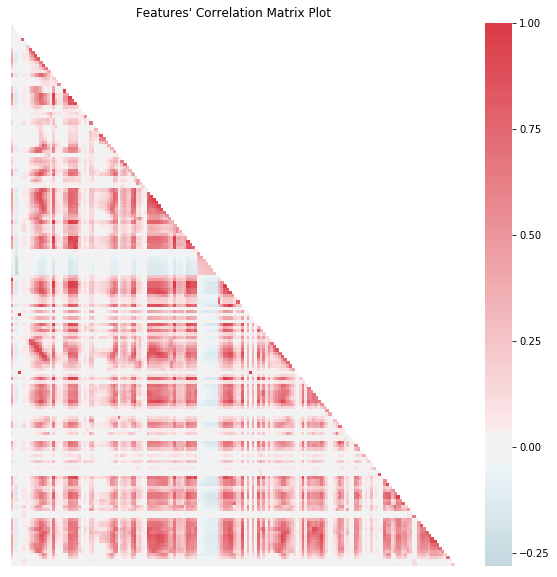

In [44]:
#correlation matrix of aps
import seaborn as sns
apscvcor = miceapsX.corr()
mask = np.zeros_like(apscvcor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plot the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(apscvcor, mask=mask, cmap=cmap,center=0,
            xticklabels=False, yticklabels=False)
plt.title("Features' Correlation Matrix Plot")

In [38]:
apscvcor = miceapsX.corr()
cor = apscvcor.abs().unstack()
#only oneself correlation = 1 
#sum(cor==1)
cor = cor[cor!=1]
cor.sort_values(ascending = False)
cor = cor.sort_values(ascending = False).drop_duplicates()
cor[cor>0.8]

aa_000  bt_000    0.998782
bu_000  bv_000    0.997570
cq_000  bu_000    0.997444
bv_000  cq_000    0.997369
bg_000  ah_000    0.997241
bb_000  bu_000    0.996127
        cq_000    0.996119
        bv_000    0.996053
an_000  ao_000    0.989360
bg_000  an_000    0.986325
ah_000  an_000    0.985569
an_000  bb_000    0.985058
        cq_000    0.984468
        bv_000    0.984394
        bu_000    0.984346
ad_000  co_000    0.983718
co_000  cf_000    0.983570
ad_000  cf_000    0.983407
am_0    al_000    0.982002
cc_000  bx_000    0.981113
ah_000  bb_000    0.981077
bg_000  bb_000    0.980561
bv_000  ah_000    0.980447
cq_000  ah_000    0.980402
ah_000  bu_000    0.980394
bg_000  cq_000    0.980249
        bv_000    0.980229
        bu_000    0.980084
bb_000  ao_000    0.974200
bv_000  ao_000    0.973254
                    ...   
ba_006  ee_003    0.811902
ee_003  cc_000    0.811640
bi_000  ci_000    0.811403
bh_000  ck_000    0.809750
ee_003  az_005    0.809437
by_000  an_000    0.809094
a

__>__ There are 305 pairs of features with high correlation (>0.8).

#### iv. Scatter Plots and Boxplots for Features with highest CV

In [20]:
#high CV dataframe
import math
n = math.floor(math.sqrt(170))
highcvfeatureaps = apscv.sort_values(ascending = False).index[:n]
apshighcvdf = miceaps[['class'] + highcvfeatureaps.tolist()]
apshighcvdfX = miceaps[highcvfeatureaps.tolist()]

highcvfeatureaps

Index(['cf_000', 'co_000', 'ad_000', 'ac_000', 'dq_000', 'eb_000', 'df_000',
       'dl_000', 'cs_009', 'dh_000', 'du_000', 'ay_001', 'bb_000'],
      dtype='object')

##### -Boxplot

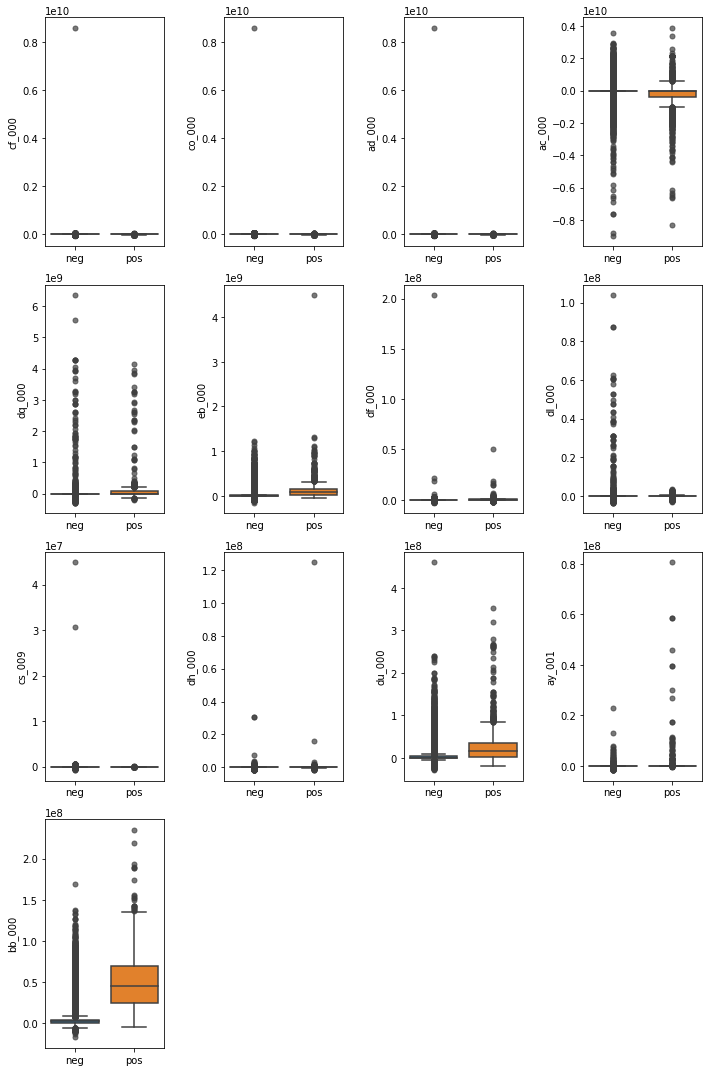

In [24]:
colname = highcvfeatureaps.tolist()

plt.figure(figsize=(10,15))
flierprops = dict(marker='o', markersize=5, alpha=0.7) #set outliers'properties

for i, col in enumerate(colname, start=1):
    plt.subplot(4,4,i)
    sns.boxplot(x="class", y=col,
                data=apshighcvdf,flierprops=flierprops).xaxis.label.set_visible(False)
    plt.ylabel(colname[i-1])
plt.tight_layout()

__>__ From the boxplots of high CV features, there are some features with obvious different value range (not overlapping) under different two classes, such as ac_000, dq_000, eb_000, du_000 and bb_000, where I consider they might have significant relationship with the 'class'. However, there are too many outliers in every feature, making the boxplots so compressed to observe, therefore I plot another plot without outliers. 

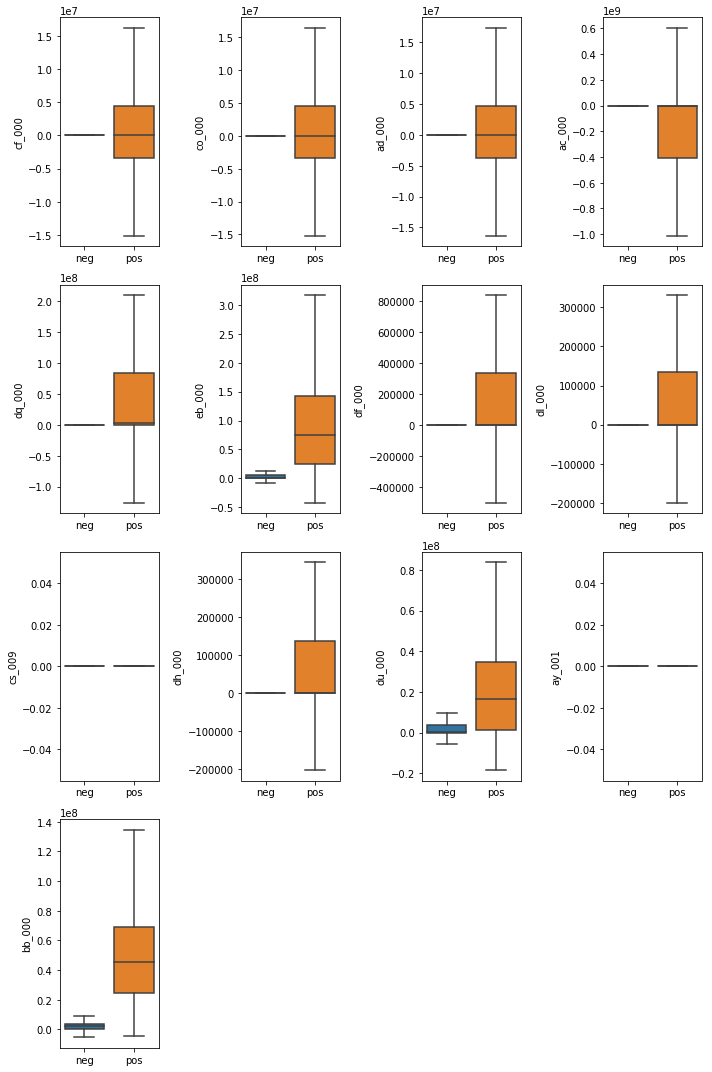

In [25]:
colname = highcvfeatureaps.tolist()

plt.figure(figsize=(10,15))
flierprops = dict(marker='o', markersize=5, alpha=0.7) #set outliers'properties

for i, col in enumerate(colname, start=1):
    plt.subplot(4,4,i)
    sns.boxplot(x="class", y=col,
                data=apshighcvdf,flierprops=flierprops, showfliers=False).xaxis.label.set_visible(False)
    plt.ylabel(colname[i-1])
plt.tight_layout()

__>__ Drawing boxplots without outliers, the features having significant difference in the previous plot remain same characteristic, some even more different, such as eb_000 and bb_000.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


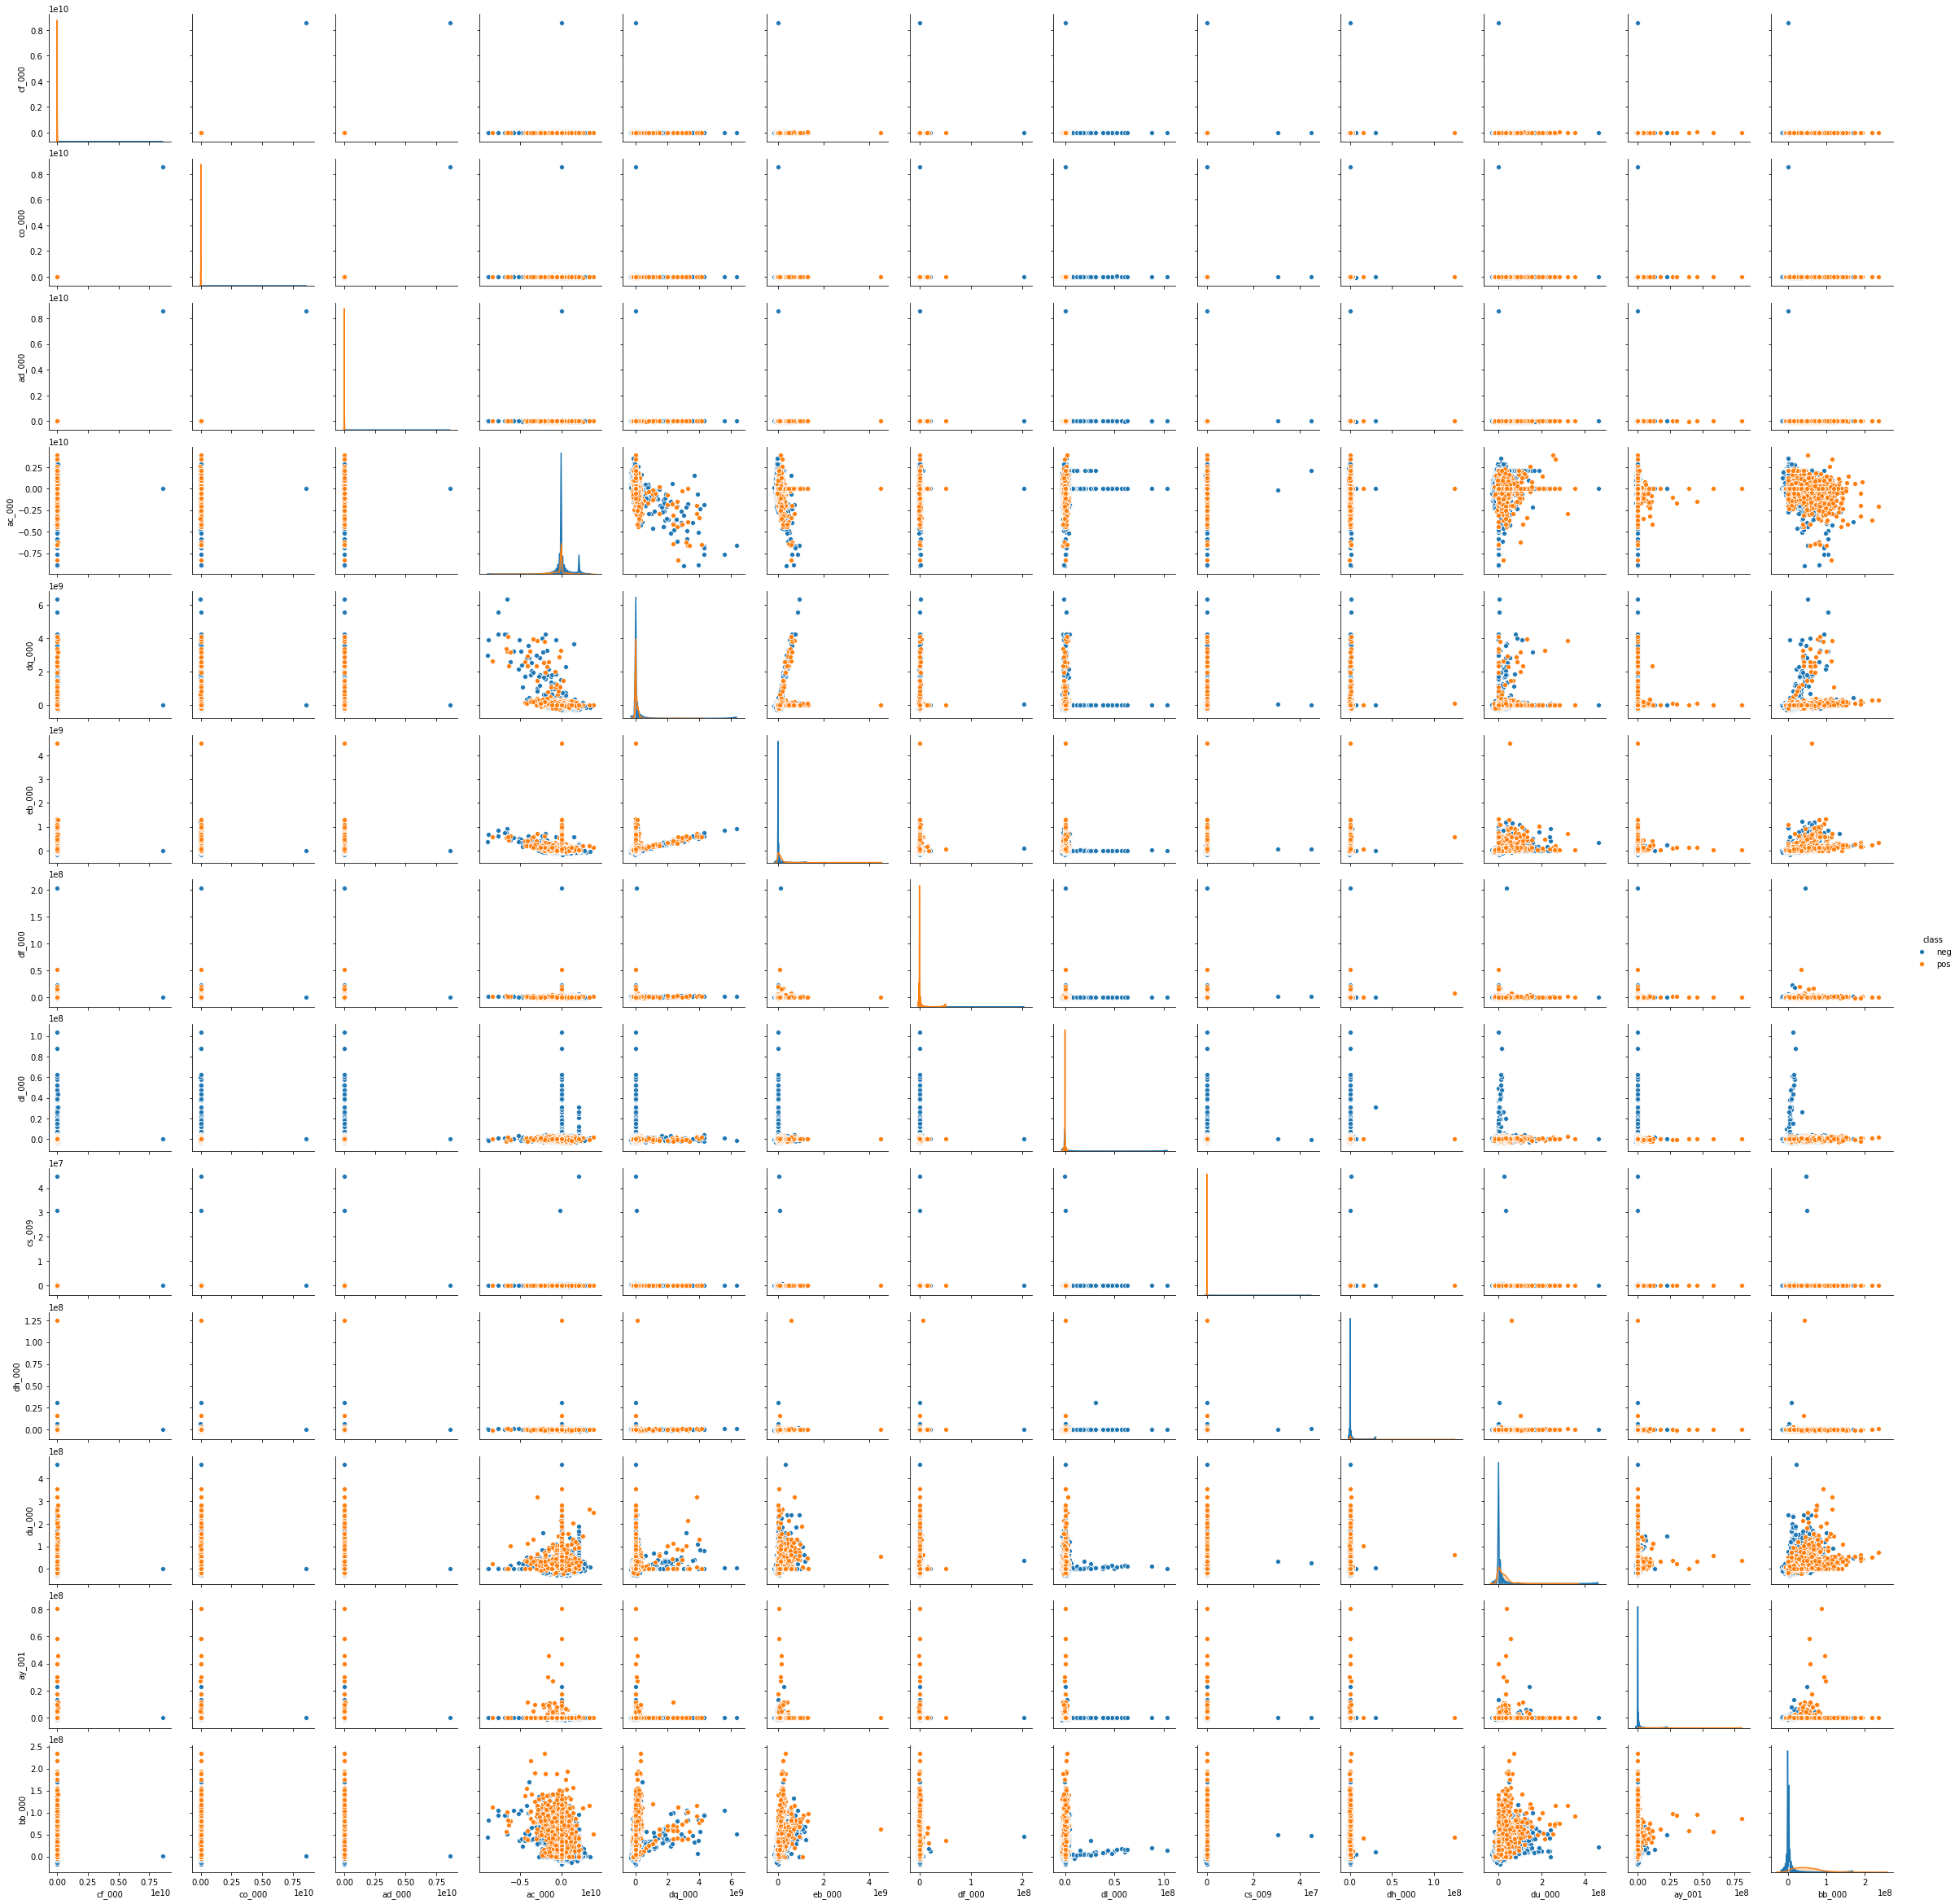

In [26]:
sns.pairplot(apshighcvdf, hue="class", diag_kind="kde")

__>__ By the scatter plot, it is hard to see pattern on different classes and judge significance of these features, because dots from different classes scatter at the similar value range of these features.

#### v. The number of Positive and Negative Data

In [56]:
miceaps['class'].value_counts()

neg    74625
pos     1375
Name: class, dtype: int64

__>__ Among all APS Failure dataset, there are up to 99% of datapoints is in 'neg' class, which means the dataset is highly unbalanced. This unbalanced problem might cause problem with high accuracy but bad TPR, however, we care more about 'pos' class 

### (c) Random Forest with Unbalance Data

In [75]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, accuracy_score

def classreport(actual, predict, prob):
    print('\n')
    print('Confusion Matrix:')
    print(pandas.crosstab(actual, predict, rownames=['actual'], colnames=['predict']))
    print('\n')
   # print('F1-score: %0.2f' % f1_score(actual, predict, average='weighted'))
    print('Accuracy: %0.4f' % accuracy_score(actual, predict))
    fpr, tpr, thresholds = roc_curve(actual, prob, pos_label='pos')
    roc_auc = round(auc(fpr, tpr), 4)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

__>__ I draw the ROC curve based on the predicted probability of the minority class ('pos').

In [73]:
from sklearn.ensemble import RandomForestClassifier

[Training Set]


Confusion Matrix:
predict    neg  pos
actual             
neg      58977   23
pos        818  182


Accuracy: 0.9860


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


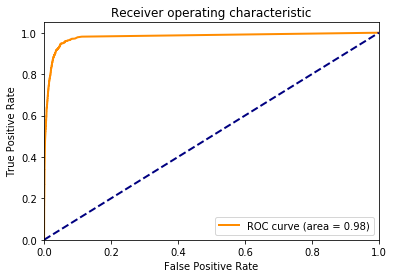

DEBUG:matplotlib.axes._base:update_title_pos


[Test Set]


Confusion Matrix:
predict    neg  pos
actual             
neg      15623    2
pos        307   68


Accuracy: 0.9807


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


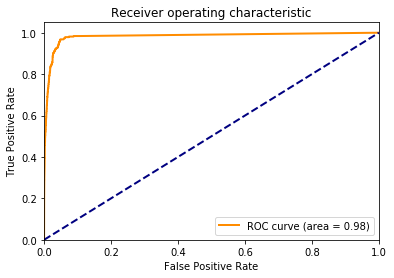

In [81]:
#imbalance
rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=2, random_state=0, oob_score=True)
rf = rf.fit(trainmiceapsX, trainmiceapsy)
trainoob_error = round(1 - rf.oob_score_, 4)
trapredy = rf.predict(trainmiceapsX) 
traproby = rf.predict_proba(trainmiceapsX)

print('[Training Set]')
classreport(trainmiceapsy, trapredy, traproby[:,1])


tepredy = rf.predict(testmiceapsX) 
teproby = rf.predict_proba(testmiceapsX)
print('[Test Set]')
classreport(testmiceapsy, tepredy, teproby[:,1])

In [83]:
print('Out of Bag Error on unbalanced data')
round(rf.oob_score_,4)

Out of Bag Error on unbalanced data


0.9858

__>__ Building random forest on the highly unbalanced data, we can see our model seems to be more easy to classify datapoits to negative class (majority), which makes it has high accuracy due to the large amount of correct classification of the majority class, but low TPR, which means a lower ability to correctly classify the positive class (minority).  

### (d) Random Forest with Compensating for Class Imbalance

__>__ Unbalanced data causes problems when building random forest. Random forest is buit on multiple decision trees, each of them uses a bag of the datapoints and a bag of features. Therefore, a bag of datapoints might contain a few or maybe none of the less prominent class, and make some decision tree biased. In sum, using random forest on unbalanced data is not a good chioce.  

[Training Set]


Confusion Matrix:
predict    neg   pos
actual              
neg      55210  3790
pos         51   949


Accuracy: 0.9360


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


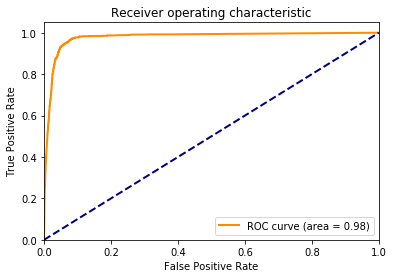

DEBUG:matplotlib.axes._base:update_title_pos


[Test Set]


Confusion Matrix:
predict    neg  pos
actual             
neg      14668  957
pos         12  363


Accuracy: 0.9394


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


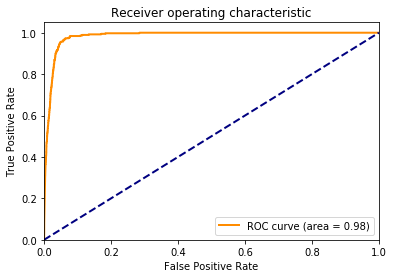

In [76]:
#balance
rfb = RandomForestClassifier(n_estimators=100, class_weight = 'balanced', 
                            max_depth=2, random_state=0, oob_score=True)
rfb = rfb.fit(trainmiceapsX, trainmiceapsy)
trainoob_errorb = round(1 - rfb.oob_score_, 4)
trapredyb = rfb.predict(trainmiceapsX) 
traprobyb = rfb.predict_proba(trainmiceapsX)

print('[Training Set]')
classreport(trainmiceapsy, trapredyb, traprobyb[:,1])


tepredyb = rfb.predict(testmiceapsX) 
teprobyb = rfb.predict_proba(testmiceapsX)

print('[Test Set]')
classreport(testmiceapsy, tepredyb, teprobyb[:,1])

In [80]:
print('Out of Bag Error on balanced data')
round(rfb.oob_score_,4)

Out of Bag Error on balanced data


0.9355

__>__ Comparison to question 2.(c):

Building random forest on both unbalance and unbalance-compensating ways have different results. When building on unbalanced data, we get high accuracy on training set and test set with nearly 98% accuracy. However, it has low TPR, only 18% of true 'pos' class datapoints are correctly predicted to the right class. Random forest with unbalance-compensating, by contrast, has a lower accuracy (94%) but a better TPR (97% on test set), which means a better ability to classify the minority class correctly. In sum, with compensating the unbalance, we sacrifice our accuracy but get a better prediction on 'pos' class. 

### (e) Logistic Model Trees with Unbalanced Data

In [5]:
import weka.core.jvm as jvm
#export JAVA_HOME=/Library/Java/JavaVirtualMachines/jdk1.8.0_131.jdk/Contents/Home
import javabridge

In [6]:
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/anaconda3/lib/python3.6/site-packages/javabridge/jars/rhino-1.7R4.jar', '/anaconda3/lib/python3.6/site-packages/javabridge/jars/runnablequeue.jar', '/anaconda3/lib/python3.6/site-packages/javabridge/jars/cpython.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/python-weka-wrapper.jar', '/anaconda3/lib/python3.6/site-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled
DEBUG:javabridge.jutil:Creating JVM object
DEBUG:javabridge.jutil:Launching VM in non-python thread
DEBUG:javabridge.jutil:Attaching to VM in monitor thread
DEBUG:javabridge.jutil:Signalling caller


In [7]:
from weka.core.converters import Loader
from weka.core.classes import Random
from weka.core.dataset import Instances
from weka.classifiers import Classifier, Evaluation, PredictionOutput
from weka.filters import Filter

In [8]:
loader = Loader(classname="weka.core.converters.CSVLoader")

In [31]:
wekatrain = loader.load_file('trainmiceaps.csv')
wekatest = loader.load_file('testmiceaps.csv')

In [34]:
wekatrain.class_index = 0
wekatest.class_index = 0

##### 5-fold Cross Validation

In [35]:
lmt = Classifier(classname='weka.classifiers.trees.LMT')

In [114]:
pred_output = PredictionOutput(
        classname="weka.classifiers.evaluation.output.prediction.PlainText", options=["-distribution"])
evaluation = Evaluation(wekatrain)
evaluation.crossvalidate_model(lmt, wekatrain, 5, Random(1), output=pred_output)    

In [115]:
print(evaluation.summary())


Correctly Classified Instances       59487               99.145  %
Incorrectly Classified Instances       513                0.855  %
Kappa statistic                          0.7143
Mean absolute error                      0.0119
Root mean squared error                  0.0835
Relative absolute error                 36.2644 %
Root relative squared error             65.1917 %
Total Number of Instances            60000     



In [118]:
print(evaluation.class_details())

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.345    0.994      0.997    0.996      0.718    0.967     0.998     neg
                 0.655    0.003    0.796      0.655    0.719      0.718    0.967     0.745     pos
Weighted Avg.    0.991    0.339    0.991      0.991    0.991      0.718    0.967     0.994     



In [124]:
cvlmt = Classifier(classname='weka.classifiers.trees.LMT')

In [144]:
folds = 5
seed = 1
rnd = Random(seed)
rand_data = Instances.copy_instances(wekatrain)
rand_data.randomize(rnd)
if rand_data.class_attribute.is_nominal:
    rand_data.stratify(folds)

#perform cross-validation
cverror = []
evaluation = Evaluation(rand_data)
for i in range(folds):
    train = rand_data.train_cv(folds, i)
    test = rand_data.test_cv(folds, i)
    #build and evaluate classifier
    cls = Classifier.make_copy(cvlmt)
    cls.build_classifier(train)
    evaluation.test_model(cls, test)
    cverror.extend([evaluation.percent_correct])

In [173]:
print('[5-fold estimator of test error building on unbalanced data]')
round(np.array(cverror).mean(), 4)

[5-fold estimator of test error building on unbalanced data]


99.119

##### Training Set

In [175]:
#Don't run!!!!!!!!
lmt.build_classifier(wekatrain)

In [108]:
trainpredy = []
trainproby = []
#print("# - actual - predicted - error - distribution")
for index, inst in enumerate(wekatrain):
    trainpredy.extend([lmt.classify_instance(inst)])
    trainproby.extend([lmt.distribution_for_instance(inst)[1]])
import numpy as np
trainpredy = np.array(trainpredy)
trainpredy = trainpredy.astype('str')
trainproby = np.array(trainproby)
trainpredy[trainpredy=='0.0']='neg'
trainpredy[trainpredy=='1.0']='pos'

[Training Set]


Confusion Matrix:
predict    neg  pos
actual             
neg      58919   81
pos        317  683




DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


Accuracy: 0.9934


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


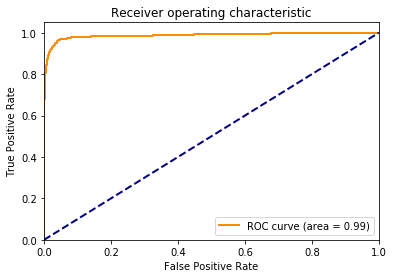

In [176]:
print('[Training Set]')
classreport(trainmiceapsy, trainpredy, trainproby)

##### Test Set

In [105]:
testpredy = []
testproby = []

for index, inst in enumerate(wekatest):
    testpredy.extend([lmt.classify_instance(inst)])
    testproby.extend([lmt.distribution_for_instance(inst)[1]])
import numpy as np
testpredy = np.array(testpredy)
testpredy = testpredy.astype('str')
testproby = np.array(testproby)
testpredy[testpredy=='0.0']='neg'
testpredy[testpredy=='1.0']='pos'    

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


[Test Set]


Confusion Matrix:
predict    neg  pos
actual             
neg      15584   41
pos        114  261


Accuracy: 0.9903


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


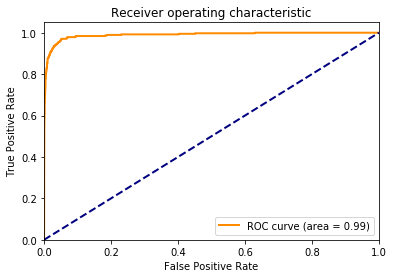

In [177]:
print('[Test Set]')
classreport(testmiceapsy, testpredy, testproby)

__>__ The 5-fold cross-validation error (99.12%) seems to be slightly better than the test error (99.03%), however, it estimate the test error better than the training error (99.34%).

### (f) Logistic Model Trees with SMOTE

##### Cross Validation

__>__ I do cross validation first, and use SMOTE oversampling techique to balance the k-1 fold training set, and use validation set to estimate the test error. I also standardize dataset before using SMOTE to pre-process the data.

In [65]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
kf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
smotecverror3 = []
smotecvlmt = Classifier(classname='weka.classifiers.trees.LMT')

for train_index, valid_index in kf.split(trainmiceapsX, trainmiceapsy):
    traX = trainmiceapsX.iloc[train_index]
    tray = trainmiceapsy[train_index]
    valX = trainmiceapsX.iloc[valid_index]
    valy = trainmiceapsy[valid_index]
    stdtraX = stdscaler(traX)
    smote = SMOTE()
    smotetraX, smotetray = smote.fit_sample(stdtraX, tray.ravel())
    smotetraX = {stdtraX.columns[i]: smotetraX[:,i] for i in range(len(stdtraX.columns))}
    smotetraX = pandas.DataFrame.from_dict(smotetraX)
    smotetra = pandas.concat([pandas.DataFrame({'class':smotetray}), smotetraX], axis = 1)
    smotetra.to_csv('smotetra.csv', encoding='utf-8', index=False)
    wekasmotetra = loader.load_file('smotetra.csv')
    wekasmotetra.class_index = 0
    smeval = Evaluation(wekasmotetra)
    cls = Classifier.make_copy(smotecvlmt)
    cls.build_classifier(wekasmotetra)
    stdvalX = stdscaler(valX)
    valy = valy.reset_index(drop=True)
    smoteval = pandas.concat([valy, stdvalX], axis = 1)
    smoteval.to_csv('smoteval.csv', encoding='utf-8', index=False)
    wekasmoteval = loader.load_file('smoteval.csv')
    wekasmoteval.class_index = 0
    smeval.test_model(cls, wekasmoteval)
    smotecverror3.extend([smeval.percent_correct])

In [69]:
smotecverror2

[69.45, 95.44166666666666, 5.625, 93.81666666666666, 94.79166666666667]

In [68]:
smotecverror3

[47.916666666666664,
 13.658333333333333,
 90.64166666666667,
 95.775,
 96.15833333333333]

__>__ I have done 2 times 5-fold cross-validation to estimate my test erorr, however there seems to have high variance while doing SOMTE oversampling to estimate the test error, there are some good validation errors, but also some poor validation errors.   

In [85]:
print('[5-fold estimator of test error building on SMOTE data]')
round(np.array(smotecverror3).mean(), 4)

[5-fold estimator of test error building on SMOTE data]


68.83

In [86]:
print('[5-fold estimator of test error building on SMOTE data]')
round(np.array(smotecverror2).mean(), 4)

[5-fold estimator of test error building on SMOTE data]


71.825

##### Training Set

In [164]:
smotelmt = Classifier(classname='weka.classifiers.trees.LMT')
smotelmt.build_classifier(wekasmotetrain)



Confusion Matrix:
predict    neg    pos
actual               
neg      58398    602
pos       1185  57815


Accuracy: 0.9849


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


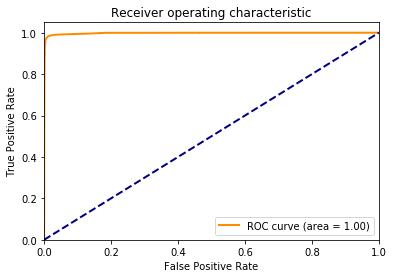

In [165]:
smotetrainpredy = []
smotetrainproby = []
#print("# - actual - predicted - error - distribution")
for index, inst in enumerate(wekasmotetrain):
    smotetrainpredy.extend([smotelmt.classify_instance(inst)])
    smotetrainproby.extend([smotelmt.distribution_for_instance(inst)[1]])
import numpy as np
smotetrainpredy = np.array(smotetrainpredy)
smotetrainpredy = smotetrainpredy.astype('str')
smotetrainpredy[smotetrainpredy=='0.0']='neg'
smotetrainpredy[smotetrainpredy=='1.0']='pos'
smotetrainproby = np.array(smotetrainproby)
classreport(smotetrainy, smotetrainpredy, smotetrainproby)

##### Test Set

In [168]:
stdtestmiceapsX = stdscaler(testmiceapsX)
smotetest = pandas.concat([testmiceapsy, stdtestmiceapsX], axis = 1)
smotetest.to_csv('smotetest.csv', encoding='utf-8', index=False)

In [169]:
wekasmotetest = loader.load_file('smotetest.csv')
wekasmotetest.class_index = 0

DEBUG:matplotlib.axes._base:update_title_pos




Confusion Matrix:
predict    neg   pos
actual              
neg      13422  2203
pos         65   310


Accuracy: 0.8582


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


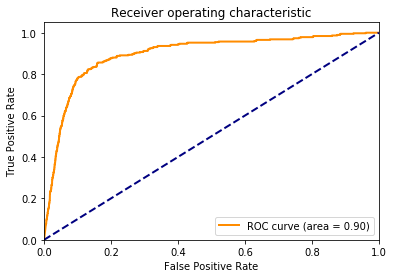

In [170]:
smotetestpredy = []
smotetestproby = []
#print("# - actual - predicted - error - distribution")
for index, inst in enumerate(wekasmotetest):
    smotetestpredy.extend([smotelmt.classify_instance(inst)])
    smotetestproby.extend([smotelmt.distribution_for_instance(inst)[1]])
import numpy as np
smotetestpredy = np.array(smotetestpredy)
smotetestpredy = smotetestpredy.astype('str')
smotetestpredy[smotetestpredy=='0.0']='neg'
smotetestpredy[smotetestpredy=='1.0']='pos'
smotetestproby = np.array(smotetestproby)
classreport(testmiceapsy, smotetestpredy, smotetestproby)

__>__ Comparison to question 2.(d):

Comparing to the Logistic Model Trees building on umbalanced data, our test error (accuracy) performs bad when using SMOTE oversampling, it missclassify the majority ('neg') more, but the TPR increase roughly 10% (from 70% to 82%), meaning the ability of classifying the minority becomes better. For this task, I think we care more about information from minority class and hope to correctly predict the less prominent class. Therefore, by using oversampling, we lose accuracy for targeting the majority class, but have more tendency to find out the true 'pos' class. 

In [27]:
jvm.stop()